# Stéganographie : décodage

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import cv2 as cv
import sys


# Programme principal
if __name__ == "__main__":
    # ouverture de l'image
    img = cv.imread("exo9-imagecacheee.png")

    # conversion en tableau numpy
    img_arr = np.array(img)

    print("shape du tableau avec les canaux RGB")
    print(img_arr.shape)
    # l'axe zéro correspond donc à la hauteur, l'axe 1 à la largeur, et l'axe 2 aux composantes RGB

    # conversion en binaire, l'option expand_dims permet d'augmenter d'une dimension pour chaque composante
    # puis de convertir chaque octet en binaire
    img_bin = np.unpackbits(np.expand_dims(img_arr, axis=-1), axis=-1)
    print("shape du tableau avec les canaux RGB passés en binaire")
    print(img_bin.shape)

    # On créé une image vierge pour placer l'image cachée
    img_cachee_bin = np.zeros_like(img_bin)
    # On place les bits de poids faible de l'image img en tant que bits de poids fort pour notre image cachée
    img_cachee_bin[:, :, :, 0:4] = img_bin[:, :, :, 4:8]
    # On retransforme les bits en entier de type uint8
    img_cachee = np.packbits(img_cachee_bin, axis=-1)
    # À ce stade, on a une dimension en trop que l'on va éliminer avec np.squeeze
    print("shape du tableau recondensé avec packbits")
    print(img_cachee.shape)
    img_cachee = np.squeeze(img_cachee)

    cv.imshow("Display window", img_cachee)
    k = cv.waitKey(
        0
    )  # Pour laisser la fenêtre active tant qu'une touche n'a pas été pressée
    cv.destroyAllWindows()  # Pour éviter des soucis liés à ipython/jupyter

shape du tableau avec les canaux RGB
(324, 196, 3)
shape du tableau avec les canaux RGB passés en binaire
(324, 196, 3, 8)
shape du tableau recondensé avec packbits
(324, 196, 3, 1)


shape du tableau avec les canaux RGB
(324, 196, 3)
shape du tableau avec les canaux RGB passés en binaire
(324, 196, 3, 8)
shape du tableau recondensé avec packbits
(324, 196, 3, 1)


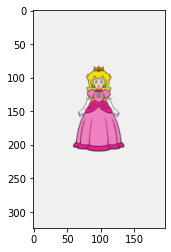

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import cv2 as cv
import sys


# Programme principal
if __name__ == "__main__":
    # ouverture de l'image
    img = cv.imread("exo9-imagecacheee.png",cv.IMREAD_COLOR)

    # conversion en tableau numpy
    img_arr = np.array(img)

    print("shape du tableau avec les canaux RGB")
    print(img_arr.shape)
    # l'axe zéro correspond donc à la hauteur, l'axe 1 à la largeur, et l'axe 2 aux composantes RGB

    # conversion en binaire, l'option expand_dims permet d'augmenter d'une dimension pour chaque composante
    # puis de convertir chaque octet en binaire
    img_bin = np.unpackbits(np.expand_dims(img_arr, axis=-1), axis=-1)
    print("shape du tableau avec les canaux RGB passés en binaire")
    print(img_bin.shape)

    # On créé une image vierge pour placer l'image cachée
    img_cachee_bin = np.zeros_like(img_bin)
    # On place les bits de poids faible de l'image img en tant que bits de poids fort pour notre image cachée
    img_cachee_bin[:, :, :, 0:4] = img_bin[:, :, :, 4:8]
    # On retransforme les bits en entier de type uint8
    img_cachee = np.packbits(img_cachee_bin, axis=-1)
    # À ce stade, on a une dimension en trop que l'on va éliminer avec np.squeeze
    print("shape du tableau recondensé avec packbits")
    print(img_cachee.shape)
    img_cachee = np.squeeze(img_cachee)
    img_cachee = cv.cvtColor(img_cachee, cv.COLOR_BGR2RGB)
    plt.imshow(img_cachee)
    plt.show()

# Stéganographie : encodage

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


import cv2 as cv
import sys


# Programme principal
if __name__ == "__main__":
    # ouverture des images
    img1 = cv.imread("exo9-mario.png")
    img2 = cv.imread("exo9-luigi.png")
    # conversion en tableau numpy
    img1_arr = np.array(img1)
    img2_arr = np.array(img2)

    # conversion en binaire, l'option expand_dims permet d'augmenter d'une dimension pour chaque composante
    # puis de convertir chaque octet en binaire
    img1_bin = np.unpackbits(np.expand_dims(img1_arr, axis=-1), axis=-1)
    img2_bin = np.unpackbits(np.expand_dims(img2_arr, axis=-1), axis=-1)

    # Opération de stéganographie : on place les bits de poids fort de img2 à la place des bits de poids faible de img1
    img1_bin[:, :, :, 4:8] = img2_bin[:, :, :, 0:4]
    # On reforme l'entier codé sur 8 bits
    img_melangee = np.packbits(img1_bin, axis=-1)
    # On enlève la dimension en trop utilisée de manière intermédiaire
    img_melangee = np.squeeze(img_melangee)
    # enregistrement de l'image mélangée
    cv.imwrite("exo9-imagecacheee2.png", img_melangee)

    # affichage de l'image mélangée.
    cv.imshow("Display window", img_melangee)
    k = cv.waitKey(
        0
    )  # Pour laisser la fenêtre active tant qu'une touche n'a pas été pressée
    cv.destroyAllWindows()  # Pour éviter des soucis liés à ipython/jupyter